# Clustering
This exercise involves working with K-means clustering, _Mean-shift clustering_, and _Agglomerative clustering_ on the poses data used for the exercises in week 2
 and week 10
. The task includes applying and experimenting with each method and then comparing their outcomes. The comparison will be conducted by clustering a sequence of human poses using these three methods in similar steps.
The dataset tensor contains 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is defined by an x and y coordinate ($25*2$). The shape of the dataset tensor is $(1403, 100, 25*2)$. For this exercise, you will use a single pose sequence of 100 frames and apply clustering to the sequence.
## Task overview
For each clustering method you will:
- Implement the method.
- Plot the clusters in the sequence.
- Plot the cluster centers.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading00">Task 1: Introduction</a>
            </li>
            <li>
            <a href="#loading_files">Task 2: Setting up the data</a>
            </li>
            <li>
            <a href="#loading">Task 3: Fitting the algorithm</a>
            </li>
            <li>
            <a href="#loading2">Task 4: K-means clustering visualization</a>
            </li>
            <li>
            <a href="#loading02">Task 5: Cluster characteristics</a>
            </li>
            <li>
            <a href="#loading3">Task 6: Elbow Method</a>
            </li>
            <li>
            <a href="#loading4">Task 7: Fitting the mean-shift algorithm</a>
            </li>
            <li>
            <a href="#loading5">Task 8: Visualizing clusters</a>
            </li>
            <li>
            <a href="#loading9">Task 9: Reflection and the bandwith parameter</a>
            </li>
            <li>
            <a href="#loading10">Task 10: Dendrograms</a>
            </li>
            <li>
            <a href="#loading11">Task 11: Fitting the agglomerative clustering alg…</a>
            </li>
            <li>
            <a href="#loading12">Task 12: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading13">Task 13: Compare and reflect on the methods</a>
            </li>
        </ul>
    </div>
</article>

<article class="message task"><a class="anchor" id="loading00"></a>
    <div class="message-header">
        <span>Task 1: Introduction</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


This task is about understanding the data.
1. Explain the benefits of applying a clustering method to a sequence of pose data.
2. Identify possible pitfalls.



</div></article>



In [0]:
# Grouping similar motions reveals patterns and outliers, but watch noise, dimensionality, and parameter choices.

The following cells import libraries and provide functions for plotting the poses:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from clustering_utils import *


# Suppress the specific warning
warnings.filterwarnings("ignore")

<article class="message task"><a class="anchor" id="loading_files"></a>
    <div class="message-header">
        <span>Task 2: Setting up the data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to load and reshape the dataset, and extract a single pose sequence of 100 frames. 
2. Choose the 100th pose sequence as the dataset.



</div></article>



In [2]:
data = np.load('poses_norm.npy')
N,T,D,C = data.shape
reshaped_data = data.reshape(N,T,D*C)
sequence = reshaped_data[191]
print(sequence.shape)

(100, 50)


## K-means Clustering
In this  exercise you will use k-means clustering on a pose sequence. 
<article class="message task"><a class="anchor" id="loading"></a>
    <div class="message-header">
        <span>Task 3: Fitting the algorithm</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to create an instance of the `KMeans`
 class with 3 clusters and to find clusters in the sequence.



</div></article>



In [20]:
# Specify the number of clusters (k)
k = 7

# Create KMeans 
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit to the data
kmeans.fit(sequence)

KMeans(n_clusters=7, random_state=42)

<article class="message task"><a class="anchor" id="loading2"></a>
    <div class="message-header">
        <span>Task 4: K-means clustering visualization</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the [documentation on the `labels_`
 attribute.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
 to obtain cluster labels. 
2. Use the `plot_single_pose`
 function to color each pose in the pose sequence according to which cluster it belongs to. 



</div></article>



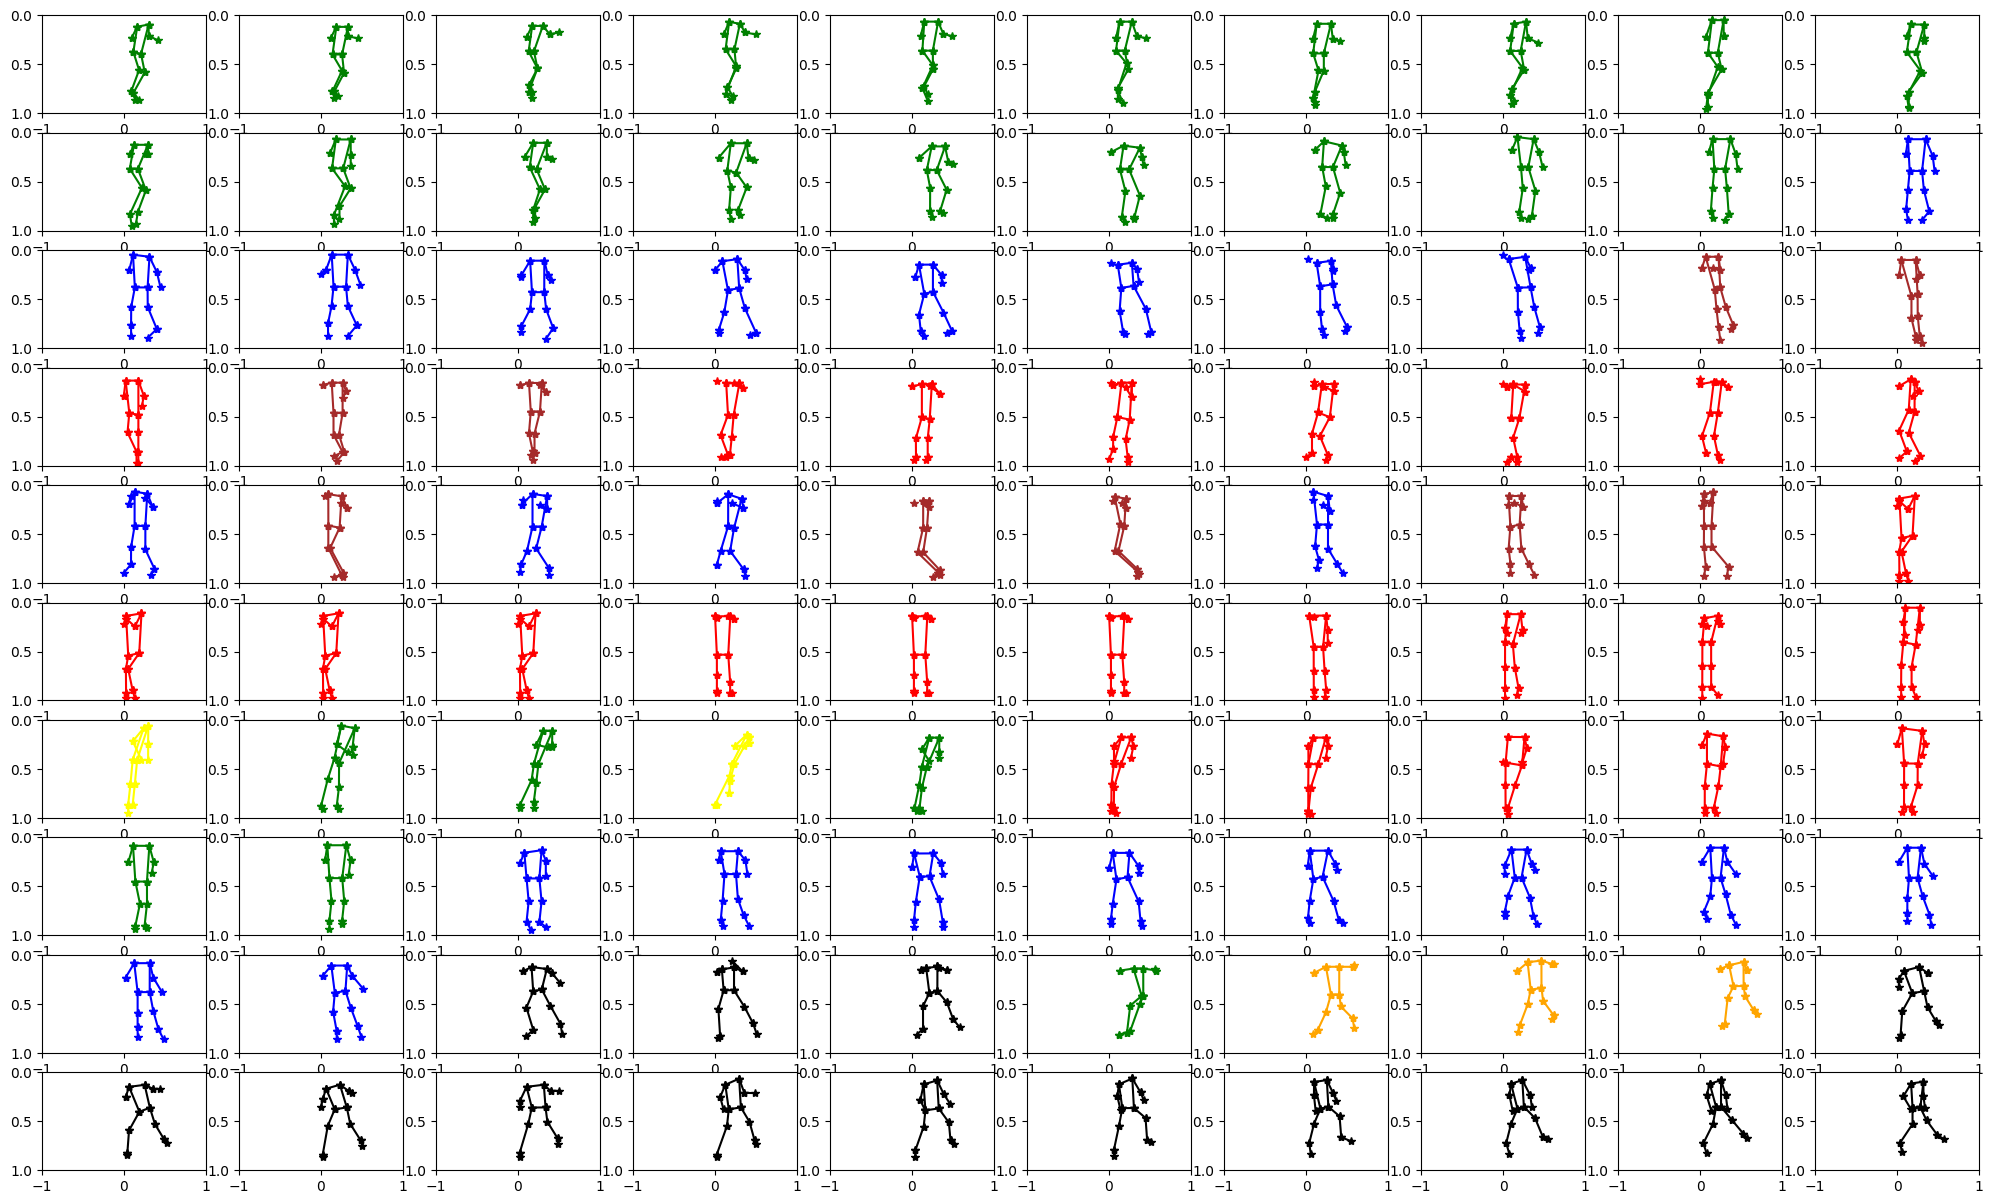

In [21]:
# You can now use 'cluster_labels' to see which cluster each frame belongs to
cluster_labels = kmeans.labels_
# 'centroids' contains the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

<article class="message task"><a class="anchor" id="loading02"></a>
    <div class="message-header">
        <span>Task 5: Cluster characteristics</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to extract and plot the cluster centers.

2. Visually inspect the results and identify the characteristics of the poses in each cluster: 
    - What distinguishes the clusters?
    - What do the cluster centers represent?
    - What do the clusters reveal about movements?


3. Reason about the choice of 3 clusters and the effect on the result.

4. Change the random state and fit the model again. Explain whether you obtain different groupings and why? 




</div></article>



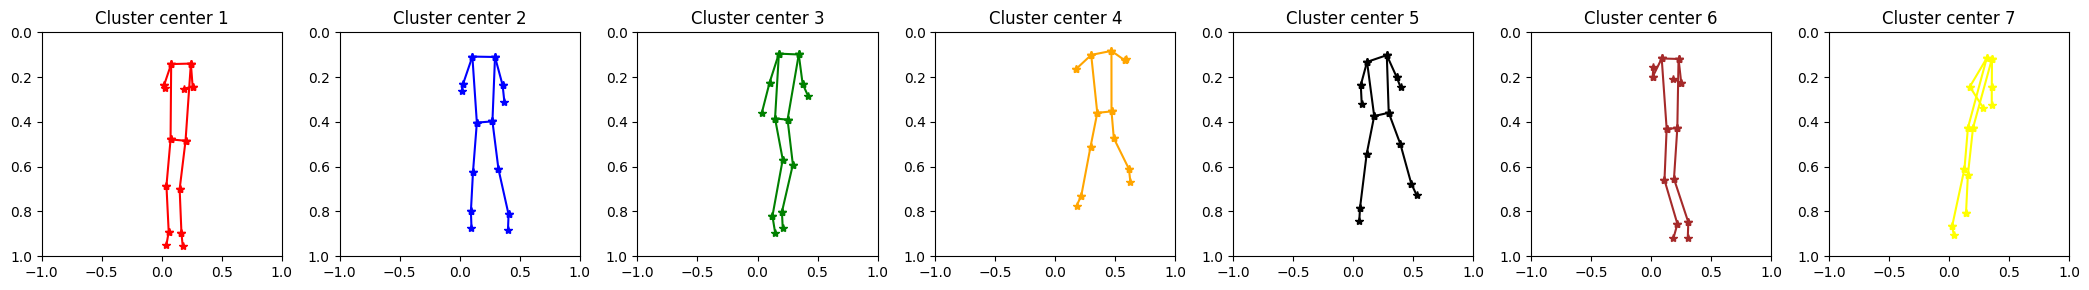

In [22]:
num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()

# Below answers were done when k=3
# The red cluster seems to be mainly standing quite tall and a bit with the side to the camera.
# The blue cluster mainly have a bit spread apart legs.
# The green cluster seems to be in some kind of jumping motion.
# Below we see the average pose for each cluster.

<article class="message task"><a class="anchor" id="loading3"></a>
    <div class="message-header">
        <span>Task 6: Elbow Method</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


This task uses the Elbow Method to choose the number of clusters `k`
. The cell below:
- Applies k-means clustering to the sequence using each `k`
 in `k_range`
.
- Extracts the within-cluster sum of squares using [`kmeans.intertia_`
](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
 and stores it in a list.
- Plots the within-cluster sum of squares as a function of the number of clusters (elbow curve as displayed below) 

1. Visually determine the optimal number of clusters.

2. Calculate the rate of change for the elbow curve and plot its absolute value. Use the curve to determine the optimal `k`
.

3. Revisit and run the previous tasks ([Task 3](#loading), [Task 4](#loading2) and [Task 5](#loading02) ) with the optimal number of clusters. 

4. How does the elbow method influence the results in the previous tasks?




</div></article>



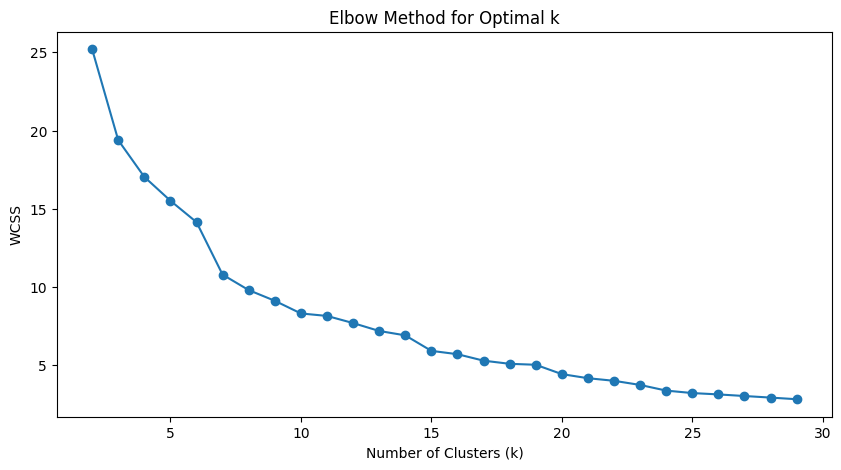

In [23]:
# Find the optimal k using the elbow method
k_range = range(2, 30) # values for the number of clusters `k`
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequence)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [0]:
# We now see that the each cluster represents each combination of their clusters better than the previous one when k=3.

## Mean-shift Clustering
This exercise is about applying mean-shift clustering to the sequence of human poses. 
<article class="message task"><a class="anchor" id="loading4"></a>
    <div class="message-header">
        <span>Task 7: Fitting the mean-shift algorithm</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to:    - create an instance of the `MeanShift()`
 class with a bandwith of 0.629 
    - cluster the pose sequence.





</div></article>



In [61]:
# Perform Mean Shift clustering
b1 = 0.629
b2 = 0.429
b3 = 0.829
bandwidth = b2
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(sequence)
cluster_labels = mean_shift.labels_
centroids = mean_shift.cluster_centers_

<article class="message task"><a class="anchor" id="loading5"></a>
    <div class="message-header">
        <span>Task 8: Visualizing clusters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Extract the cluster labels for each pose in the sequence. Use the `labels_`
 attribute as described in the [documentation on mean-shift clustering.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

2. Visualize the pose sequence, assigning a distinct color to each pose based on its cluster.
3. Extract and plot the cluster centers using the `cluster_centers_`
 attribute.



</div></article>



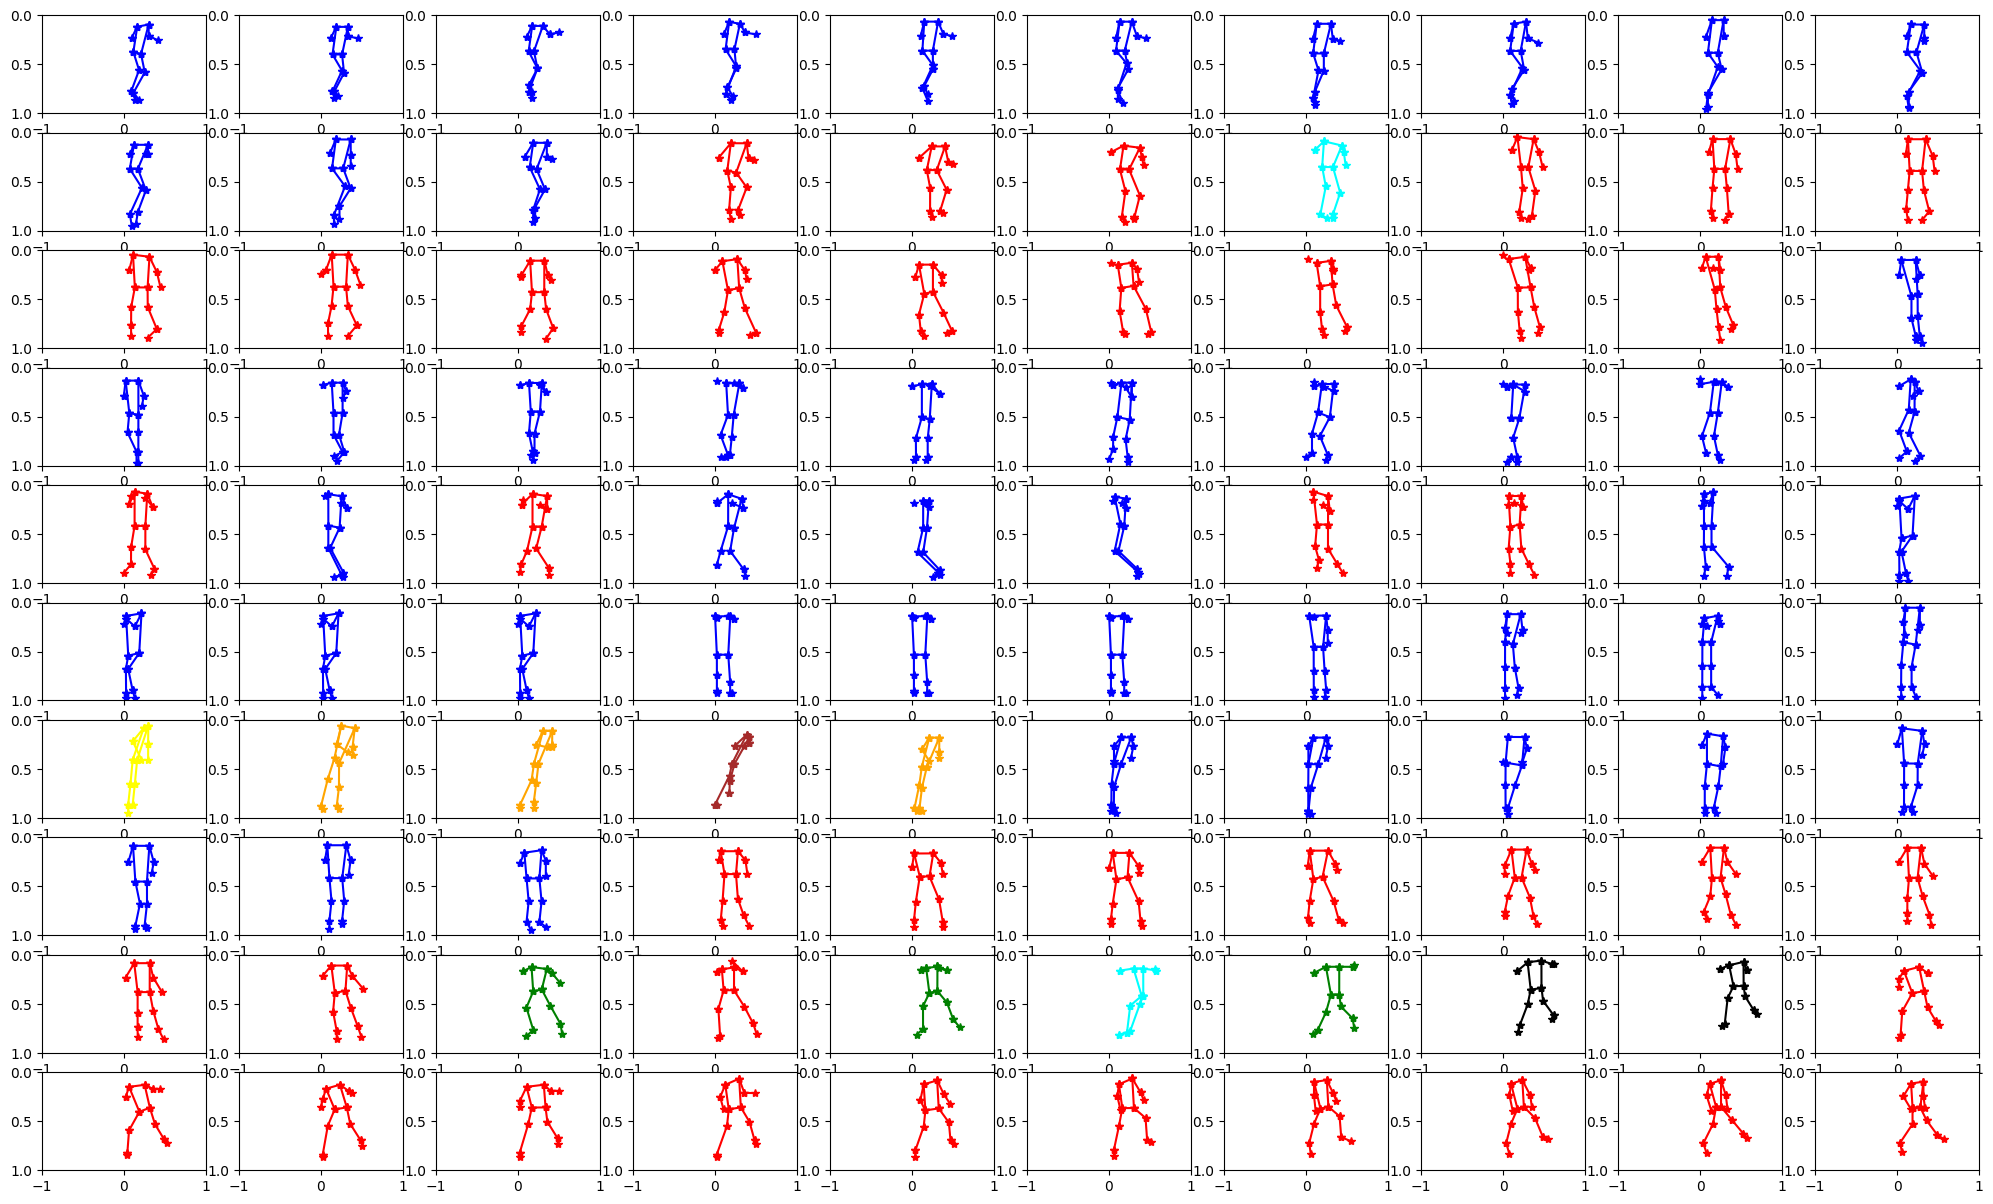

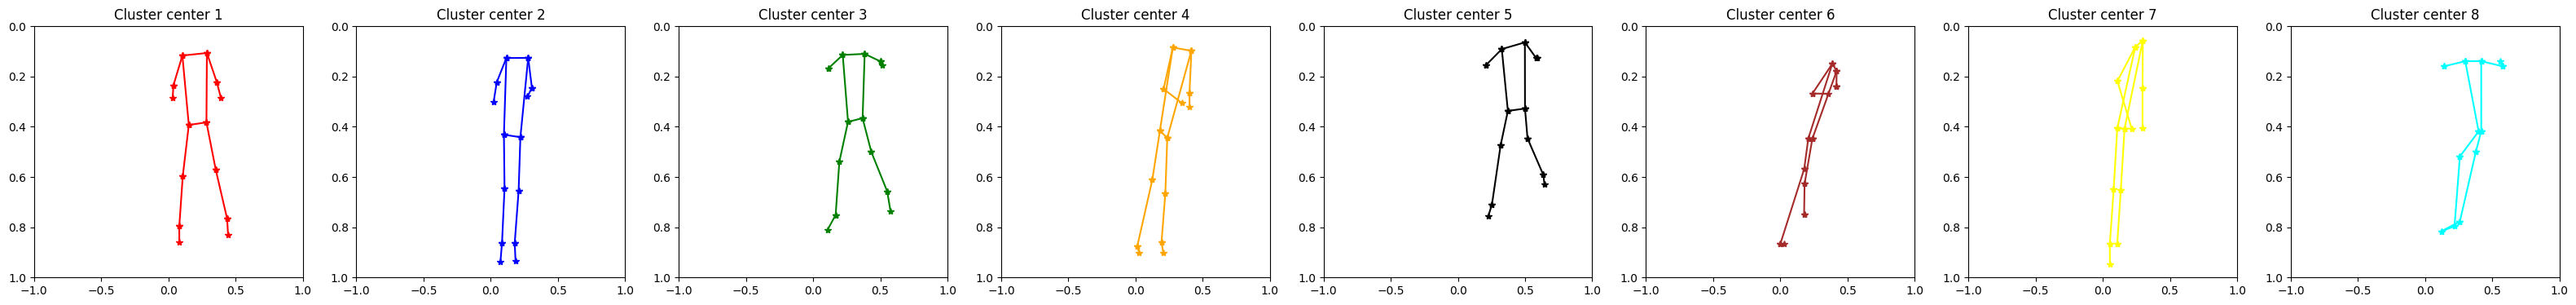

In [65]:
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
plt.show()

figure_width = len(centroids) * 5
figure_height = len(centroids) / 2
plt.figure(figsize=(figure_width,figure_height))
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
plt.show()

<article class="message task"><a class="anchor" id="loading9"></a>
    <div class="message-header">
        <span>Task 9: Reflection and the bandwith parameter</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Visually examine the plots. What are the characteristics of the poses belonging to each cluster?
2. What effect does decreasing and increasing the bandwidth parameter by 0.2 (0.829 / 0.429) have and why?

<article class="message is-info">
  <div class="message-header">Info</div>
  <div class="message-body">

  You might encounter longer run times for lower bandwith values.


  </div>
</article>


</div></article>



In [0]:
# When we clustered using the MeanShift with a bandwidth of 0.629 we could still see poses which were quite similar in different clusters.
# This means the MeanShift clustering is not low enough to separate the poses into different clusters.
# When we instead used a bandwidth of 0.429 we could see that the poses were separated into different clusters.
# When we plotted the centroids we could also see that the poses were still mainly separated into different clusters.
# Thus using a bandwidth of 0.429 seems to be the better choice for this data.

# Written with a bandwidth of 0.429
# The characteristics seem to be the way the body is facing, the position of the legs and if they are jumping.

# Increasing the bandwidth will give fewer clusters, give less granular segmentations, and will probably converge quicker.
# Decreasing the bandwidth will give more clusters, give more granular segmentations, and will probably converge slower.

# MeanShift tried to find a local maximum in the density of the data points.

## Agglomerative Clustering
This exercise is about applying hierarchical clustering to the human poses dataset.
<article class="message task"><a class="anchor" id="loading10"></a>
    <div class="message-header">
        <span>Task 10: Dendrograms</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to generate a dendrogram. 
2. How many clusters would result from setting the distance threshold to: 0.5, 1.5, 3.0, 4?
3. What types of relationships can agglomerative clustering reveal that non-hierarchical methods might miss?



</div></article>



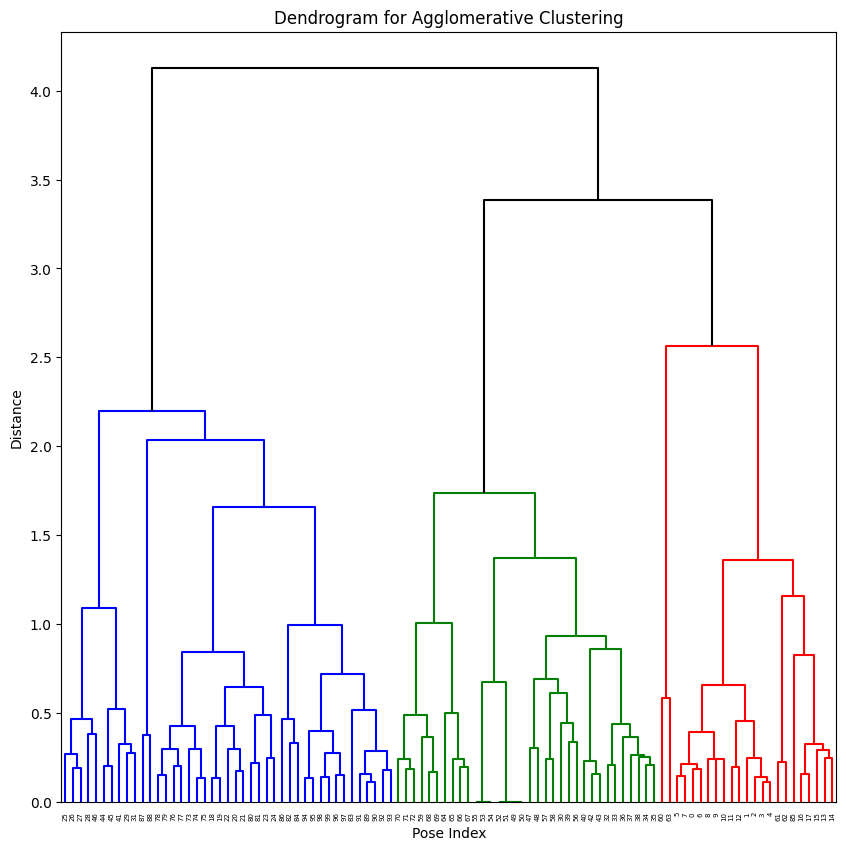

In [66]:
colors = {0: 'black', 1: 'blue', 2: 'green', 3: 'red'}
sns.set_palette([colors[i] for i in range(len(colors))])
shc.set_link_color_palette(None)
plt.figure(figsize=(10,10))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Pose Index')
plt.ylabel('Distance')
linkage_matrix = shc.linkage(sequence, method ='ward', metric="euclidean")
Dendrogram = shc.dendrogram(linkage_matrix)

<article class="message task"><a class="anchor" id="loading11"></a>
    <div class="message-header">
        <span>Task 11: Fitting the agglomerative clustering algorithm</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


The cell below creates an instance of the `AgglomerativeClustering()`
 class. The [documentation on agglomerative clustering is given here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

1. Select the distance threshold that results in 3 clusters, then apply agglomerative clustering on the sequence. 
2. Extract the cluster labels for each pose in the sequence.
3. Visualize the pose sequence by assigning a distinct color to each pose based on its cluster.



</div></article>



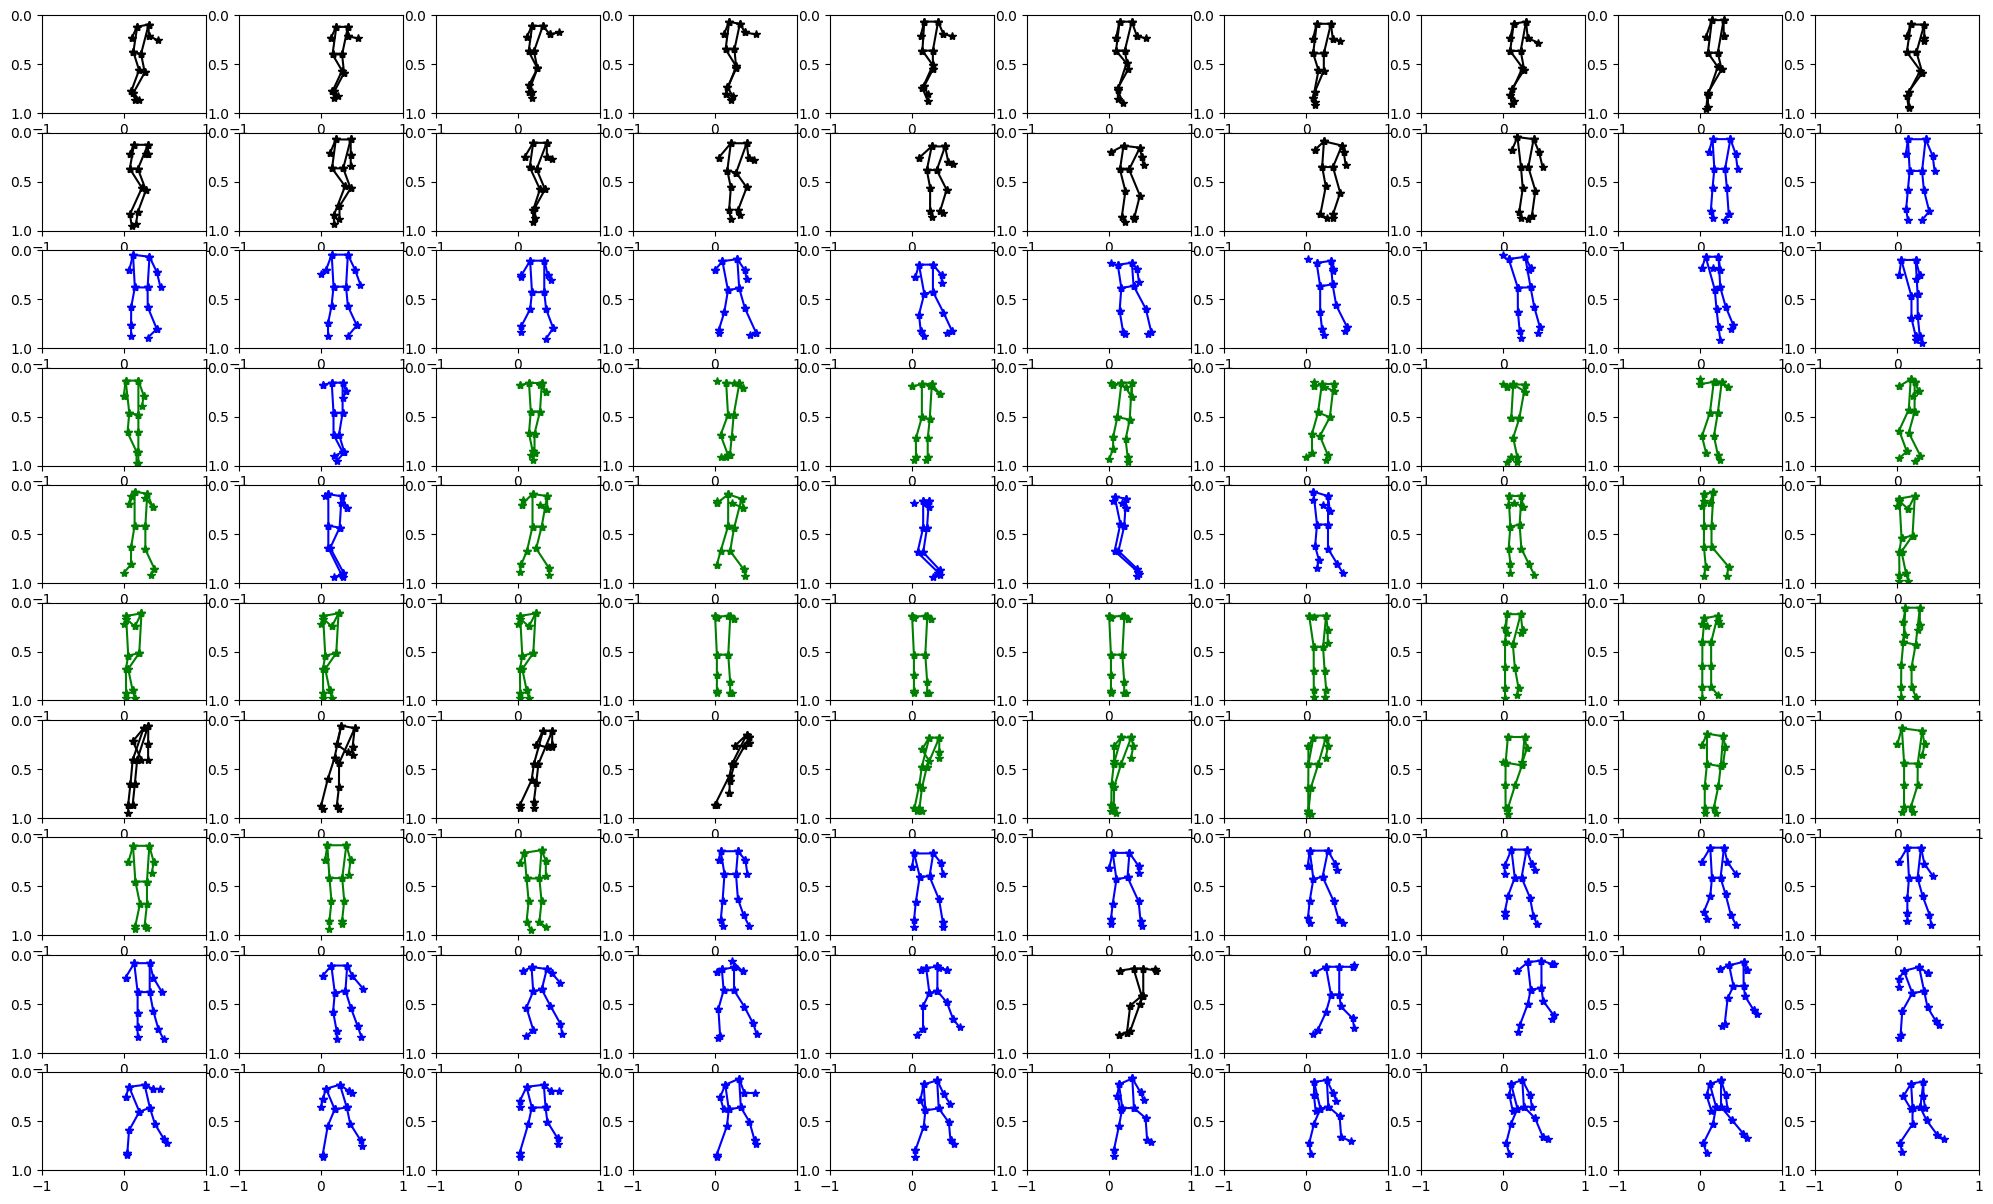

In [73]:
k = 3
agg_clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')

agg_clustering.fit(sequence)
cluster_labels = agg_clustering.labels_

cluster_labels = agg_clustering.labels_
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

<article class="message task"><a class="anchor" id="loading12"></a>
    <div class="message-header">
        <span>Task 12: Agglomerative clustreing algorithm mean pose</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. The `AgglomerativeClustering()`
 class does not have an attribute or a method for directly extracting cluster centers. Calculate the mean pose within each cluster for $k = 3$  and plot it.
2. Change the distance metric (try `l1`
 and `cosine`
) and repeat the previous two tasks ([Task 10](#loading10), [Task 11](#loading11) and [Task 12](#loading12).1). 
3. What differences do you observe, and can you explain why these differences occur? Does a different distance metric result in more meaningful clusters?



</div></article>



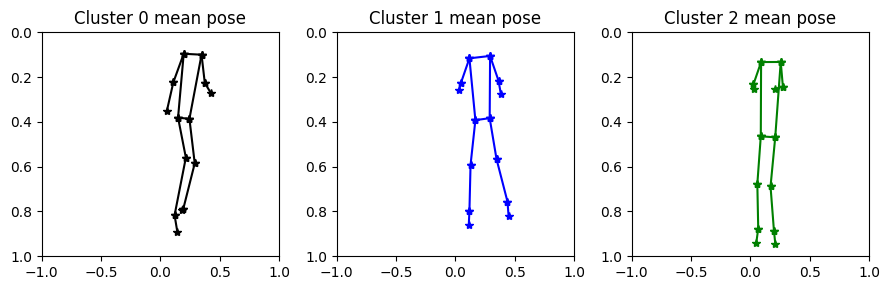

In [74]:
# After fitting AgglomerativeClustering, compute each cluster's mean pose:
#   1) Gather members of each cluster,
#   2) Average them to get the “mean pose,”
#   3) Plot each mean pose.

import numpy as np

# Suppose agg_clustering is fitted, producing cluster_labels, and sequence is NxD
n_clusters = 3
means = []
for cluster_id in range(n_clusters):
    # Extract all poses belonging to this cluster
    cluster_points = sequence[cluster_labels == cluster_id]
    # Compute the mean pose
    cluster_mean = np.mean(cluster_points, axis=0)
    means.append(cluster_mean)

# Visualize the mean poses
plt.figure(figsize=(3*n_clusters, 3))
for i, mean_pose in enumerate(means):
    plt.subplot(1, n_clusters, i + 1)
    plot_single_pose(mean_pose, c=colors[i], head=False)
    plt.title(f"Cluster {i} mean pose")
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

## Comparison
<article class="message task"><a class="anchor" id="loading13"></a>
    <div class="message-header">
        <span>Task 13: Compare and reflect on the methods</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Compare the clustered poses obtained with the different clustering methods (K-means, Mean-shift and Agglomerative clustering). What are the similarities and differences between the pose clusters across methods?
2. Why can clusters look similar across methods? 
3. What are the main reasons behind differences in the clusters?
4. The algorithms use different methods for determining the number of clusters. How do these differences impact the results for the pose data?



</div></article>



In [0]:
# K-means, MeanShift, and Agglomerative can produce similar “mean” poses if the data forms clear patterns.
# They differ in how cluster boundaries are determined. K-means uses centroids, MeanShift finds density
# modes, and Agglomerative merges stepwise. Poses may look alike across methods if clusters are strongly
# separated or share upright posture. Discrepancies arise when borderline points shift clusters. K-means
# sets k, MeanShift’s bandwidth merges or splits clusters, Agglomerative uses linkage cuts. These choices
# can alter final cluster counts and how distinct each group is.